In [306]:
import requests
import bs4 as BeautifulSoup
import numpy as np
import pandas as pd
# import re

In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [3]:
def get_leafly_urls(driver, master_list):
    '''
    Gets a list of each strain in the database
    '''
#     starting = "get_leafly_urls starting..."
#     print(master_list)

    webpage = driver.page_source

    # Make the soup for the page
#     source_code = requests.get(webpage)
#     plain_text = source_code.text
    soup = BeautifulSoup.BeautifulSoup(webpage, 'html.parser')

#div: class strain-tile notranslate
    strain_link = soup.findAll("a", {"class" : "ng-scope"}, href=True) # if not, try "ga_Explore_Strain_Tile"

    print(len(strain_link)) # check all strains loaded into strain_link

# ADD EACH STRAIN TO master_list
    for strain in strain_link:
        print(strain['href'])
        master_list.append(strain['href'])

    
    
# # GET STRAIN URLS FOR EACH PAGE IN THE LIST

#         strain_links = soup.find("ul", {"class" : "strains-list"})

#         for li in strain_links.findAll('li'):
#             li = str(li)
#             link = li[li.find("href=")+6:li.rfind('\">')] # redo as a regex?    
#             print(link)
#             master_list.append(link) # ADD THE STRAIN URL TO THE MASTER LIST

#     return master_list

In [4]:
def a():
    print()

In [5]:
a()

In [13]:
# SELENIUM CODE TO SET UP THE WEBDRIVER, GET TO THE LIST OF STRAINS

# WEBDRIVER HERE: /Users/abgrss/Documents/Projects/Brain Station/00 Capstone project/operadriver_mac64/operadriver
driver = webdriver.Opera(executable_path='operadriver_mac64/operadriver')

# FULL PAGE: https://www.leafly.ca/explore/sort-alpha

# BECAUSE THERE ARE TOO MANY STRAINS TO LOAD AT ONCE, DIVIDE THE WORK INTO THREE CATEGORIES; SATIVA, INDICA, HYBRID 

category = "hybrid"

driver.get(f"https://www.leafly.ca/explore/sort-alpha#/explore/category-{category}/sort-alpha") # swapped for "www.leafly.ca" - assume geo/age prompt arises
driver.set_page_load_timeout(30)
# driver.maximize_window()
driver.implicitly_wait(5)

# Get to leafly.ca main page (pass location/age confirm)
select = Select(driver.find_element_by_id("canada-province-select"))
select.select_by_value("ON")
driver.find_element_by_id("tou-continue").click()


# WHILE THERE IS A "LOAD MORE" BUTTON ON THE PAGE, CLICK IT
doneyet = False
while doneyet == False:
    wait = WebDriverWait(driver, 10) # set up a 10 second explicit wait
    try:
        button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,"ga_Explore_LoadMore")))     
        button.click()
    except:
        doneyet = True
        print("Loaded all strains!")

master_list = []
get_leafly_urls(driver,master_list)

Loaded all strains!
1493
/Hybrid/100-og
/Hybrid/98-white-widow
/Hybrid/13-dawgs
/Hybrid/22
/Hybrid/24k-gold
/Hybrid/3-kings
/Hybrid/3rd-coast-panama-chunk
/Hybrid/501st-og
/Hybrid/100-og
/Hybrid/98-white-widow
/Hybrid/13-dawgs
/Hybrid/22
/Hybrid/24k-gold
/Hybrid/3-kings
/Hybrid/3rd-coast-panama-chunk
/Hybrid/501st-og
/Hybrid/541-kush
/Hybrid/707-headband
/Hybrid/840
/Hybrid/a-dub
/Hybrid/a-train
/Hybrid/acdc
/Hybrid/ak-47
/Hybrid/ak-48
/Hybrid/aberdeen
/Hybrid/acid
/Hybrid/afcrack
/Hybrid/afghan-diesel
/Hybrid/afghan-haze
/Hybrid/afghan-widow
/Hybrid/afghanica
/Hybrid/afpak
/Hybrid/afrodite
/Hybrid/afternoon-delight
/Hybrid/afwreck
/Hybrid/agent-orange
/Hybrid/agent-tangie
/Hybrid/agharta
/Hybrid/als-dream
/Hybrid/alaska-thunder-grape
/Hybrid/albert-walker
/Hybrid/alchemy
/Hybrid/alf
/Hybrid/alien-abduction
/Hybrid/alien-apparition
/Hybrid/alien-asshat
/Hybrid/alien-breath
/Hybrid/alien-hallucination
/Hybrid/alien-inferno
/Hybrid/alien-og
/Hybrid/alien-reunion
/Hybrid/alien-rock-candy


In [12]:
indica_list = master_list.copy()
indica_list

['/Indica/3-bears-og',
 '/Indica/303-og',
 '/Indica/3x-crazy',
 '/Indica/5th-element',
 '/Indica/8-ball-kush',
 '/Indica/818-og',
 '/Indica/831-og',
 '/Indica/9-pound-hammer',
 '/Indica/3-bears-og',
 '/Indica/303-og',
 '/Indica/3x-crazy',
 '/Indica/5th-element',
 '/Indica/8-ball-kush',
 '/Indica/818-og',
 '/Indica/831-og',
 '/Indica/9-pound-hammer',
 '/Indica/91-krypt',
 '/Indica/999',
 '/Indica/a-10',
 '/Indica/abusive-og',
 '/Indica/ace-killer-og',
 '/Indica/ace-of-spades',
 '/Indica/afghan-big-bud',
 '/Indica/afghan-hawaiian',
 '/Indica/afghan-kush',
 '/Indica/afghan-skunk',
 '/Indica/afghan-sour-kush',
 '/Indica/afghani',
 '/Indica/afgahni-bullrider',
 '/Indica/afghani-cbd',
 '/Indica/afghanimal',
 '/Indica/afghooey',
 '/Indica/afgoo',
 '/Indica/afgooey',
 '/Indica/afkansastan',
 '/Indica/air-jordan-og',
 '/Indica/alien-bubba',
 '/Indica/alien-dawg',
 '/Indica/alien-kush',
 '/Indica/alien-rift',
 '/Indica/alien-technology',
 '/Indica/aliens-on-moonshine',
 '/Indica/allen-iverson-og

In [307]:
len(master_list)

1493

In [308]:
len(sativa_list)

483

In [309]:
master_list[0]

'/Hybrid/100-og'

In [320]:
indica_list

['/Indica/3-bears-og',
 '/Indica/303-og',
 '/Indica/3x-crazy',
 '/Indica/5th-element',
 '/Indica/8-ball-kush',
 '/Indica/818-og',
 '/Indica/831-og',
 '/Indica/9-pound-hammer',
 '/Indica/3-bears-og',
 '/Indica/303-og',
 '/Indica/3x-crazy',
 '/Indica/5th-element',
 '/Indica/8-ball-kush',
 '/Indica/818-og',
 '/Indica/831-og',
 '/Indica/9-pound-hammer',
 '/Indica/91-krypt',
 '/Indica/999',
 '/Indica/a-10',
 '/Indica/abusive-og',
 '/Indica/ace-killer-og',
 '/Indica/ace-of-spades',
 '/Indica/afghan-big-bud',
 '/Indica/afghan-hawaiian',
 '/Indica/afghan-kush',
 '/Indica/afghan-skunk',
 '/Indica/afghan-sour-kush',
 '/Indica/afghani',
 '/Indica/afgahni-bullrider',
 '/Indica/afghani-cbd',
 '/Indica/afghanimal',
 '/Indica/afghooey',
 '/Indica/afgoo',
 '/Indica/afgooey',
 '/Indica/afkansastan',
 '/Indica/air-jordan-og',
 '/Indica/alien-bubba',
 '/Indica/alien-dawg',
 '/Indica/alien-kush',
 '/Indica/alien-rift',
 '/Indica/alien-technology',
 '/Indica/aliens-on-moonshine',
 '/Indica/allen-iverson-og

In [37]:
all_strains = []
all_strains = master_list + sativa_list + indica_list

In [38]:
len(all_strains)

2743

If we want, we can print the master_list of all strains in the DB to a text file.

In [40]:
text_file = open("leafly_strain_list.txt", "w")
for i in all_strains:
    text_file.write(f"{i}\n")

Likewise, we can also upload the DB text file.

In [46]:
# all_strains = []
text_file = open("leafly_strain_list.txt", "r")

all_strains = text_file.readlines()

Now, we create the dataframes that will store all the scraped information.

In [303]:
df = pd.DataFrame(columns=['Strain', 'Url', 'Strain type', 'Rating', 'NumReviews', 'effmedneg' ,\
                           'Strain description','Parents','Flavours', 'Review breakdown'])

In [ ]:
df_reviews = pd.DataFrame(columns=['Strain', 'Reviewer', 'Reviewer_rating', 'Reviewer_description', 'Review_date'])

Now the function that will scrape each page.

In [310]:
df

,Strain,Url,Strain type,Rating,NumReviews,effmedneg,Strain description,Parents,Flavours,Review breakdown


In [339]:
# SCRAPES EACH PAGE IN LEAFLY FOR A GIVEN LIST OF STRAINS in the form of master_list

def strain_scraper(all_strains, df):
    '''
    - Scrapes each individual page in www.leafly.ca for the following information:
        Strain Name, Strain Type, Strain Rating, # Reviews, Review breakdown, Strain Description,
        Effects(5), Medical(5), Negatives (5), Lineage, Testdata, Flavours (3).
    - Returns a dataframe with the columns of df.
    '''
    
    # GET URL
    all_urls = ["https://www.leafly.ca"+row for row in all_strains]
    
    for url in all_urls:
        print(url)
        source_code = requests.get(url)
        plain_text = source_code.text
        soup = BeautifulSoup.BeautifulSoup(plain_text, 'html.parser')

    # GET strain (Name)
        strain = ""
        try:
            strain = soup.find("h1", {"itemprop" : "name"}).text
#             print(f"Strain: {strain}")
        except:
            print(f"COULD NOT GET STRAIN NAME FOR {strain}")
            strain = "ERROR"
              
    # GET strain_type (Hybrid, Indica, Sativa)
        strain_type = ""
#         print(f"URL: {url}")
        if ("Hybrid" in url) or ("hybrid" in url):
            strain_type = "hybrid"
        elif ("Sativa" in url) or ("sativa" in url):
            strain_type = "sativa"
        elif ("Indica" in url) or ("indica" in url):
            strain_type = "indica"
        else:
            print(f"COULD NOT GET STRAIN_TYPE FOR {strain}")
#         print(f"Strain type: {strain_type}")

    # GET rating
        rating = 0
        try:
            temp = soup.find("div", {"itemprop" : "aggregateRating"})
            temp2 = temp.find_next('span')
            rating = float(temp2.get('star-rating'))
#             print(f"Rating: {rating}")
        except:
            print(f"COULD NOT GET RATING FOR {strain}")

    # GET num_reviews
        num_reviews = 0
        try:
            num_reviews = int(soup.find("span", {"itemprop" : "reviewCount"}).text)
#             print(f"# of reviews: {num_reviews}")
        except:
            print(f"COULD NOT GET NUM_REVIEWS FOR {strain}")

    # GET strain_description
        strain_description = 0
        try:
            strain_description = str(soup.find("div", {"itemprop" : "description"}).text).rstrip()
#             print(f"Description: {strain_description}")
        except:
            print(f"COULD NOT GET STRAIN_DESCRIPTION FOR {strain}")

    # GET effects, medical, negatives - each of the 15 total are stored as string "effect_name-effect_pct"
        effmedneg = []
        
        try:
            bars_names = soup.find_all("div", {"class" : "m-attr-label"}) # GET EFF/MED/NEG NAMES
            bars_values = soup.find_all("div", {"class" : "m-attr-bar"}) # GET EFF/MED/NEG VALUES

            if len(bars_names) != len(bars_values): # VALUE CHECK
                print(f"ERROR - EFF/MED/NEG BARS DON'T MATCH FOR {strain}")
                
            names_values = zip(bars_names, bars_values) # ZIP THE RESULT SETS (LISTS) TOGETHER
            
            for (n,v) in names_values:
                name = n.text # Get the eff/med/neg name
                value = str(v.get('style')) # Get the eff/med/neg value
                value = value[6:-1] # removes "width:" and "%" around value
                effmedneg.append(name + " " + value) # ADD "{name}-{value}" TO effmedneg
#             print(f"Effects, Medical & Negatives: {effmedneg}")
        except:
            print(f"COULD NOT GET EFFECTS FOR {strain}")
        
    # GET parents
        parents = []
        try:
            temp = soup.find_all("ul", {"class": "strain-tile--md clearfix"})
            for item in temp: # FOR EVERY PARENT IN TEMP...
                for i in item.find_all('a'): # ... GET THE PARENT'S URL ENDING, e.g. "/hybrid/og-kush"
                    parent = i.get('href')
                    parents.append(parent)
#             print(f"Parents: {parents}")
        except:
            print(f"COULD NOT GET LINEAGE FOR {strain}")
        
    # GET flavours
        flavours = []
        try:
            temp = soup.find_all("span", {"class": "copy--xs copy-sm-md copy-md--lg"})
            for item in temp:
                flavour = item.text
                flavour = flavour[3:] # omit flavour numbering, e.g. "1. Earthy"
                flavours.append(flavour)
#             print(f"Flavours: {flavours}")
        except:
            print(f"COULD NOT GET FLAVOURS FOR {strain}")
    
    # GET review_breakdown, FORMAT: LIST OF 6 VALUES (0-100)
        review_breakdown = []
        
        review_url = url+"/reviews"
        source_code_rev = requests.get(review_url)
        plain_text_rev = source_code_rev.text
        review_soup = BeautifulSoup.BeautifulSoup(plain_text_rev, 'html.parser')
        try:
            bowl = review_soup.find_all("div", {"class" : "m-attr-bar"})
            for item in bowl:
#                 print(f"BOWL: {bowl}\n")
                value = str(item.get('ng-style')) # Get the eff/med/neg value
                value = value[10:-3] # removes "width:" and "%" around value
#                 print(value)
                review_breakdown.append(float(value))
#             print(f"Review Breakdown: {review_breakdown}")
            
            if len(review_breakdown) != 6: # length check
                print(f"ERORR: REVIEW_BREAKDOWN IS LENGTH {len(review_breakdown)}")
        except:
            print(f"COULD NOT GET REVIEW BREAKDOWN FOR {strain}")

    # APPEND ITEMS TO THE INCOMING DF    
        data = pd.DataFrame([[strain, url, strain_type, rating, num_reviews, effmedneg,\
                             strain_description, parents, flavours, review_breakdown]], columns = df.columns)
#         print(data)
        
#         print(df)
        df = df.append(data, ignore_index=True)
        
        print(len(df))
        
    return df

df = strain_scraper(all_strains,df)



# EXAMPLE OF A NO-REVIEW STRAIN: https://www.leafly.ca/hybrid/sour-lifesavers

# # FINALLY, FOR EACH URL IN master_list, SCRAP THE PAGE AND APPEND TO df
# for url in master_list:
#     data = page_scraper(url,df)
#     df = df.append(data, ignore_index=True)
# df



https://www.leafly.ca/Hybrid/100-og
1
https://www.leafly.ca/Hybrid/98-white-widow
2
https://www.leafly.ca/Hybrid/13-dawgs
3
https://www.leafly.ca/Hybrid/22
4
https://www.leafly.ca/Hybrid/24k-gold
5
https://www.leafly.ca/Hybrid/3-kings
6
https://www.leafly.ca/Hybrid/3rd-coast-panama-chunk
7
https://www.leafly.ca/Hybrid/501st-og
8
https://www.leafly.ca/Hybrid/100-og
9
https://www.leafly.ca/Hybrid/98-white-widow
10
https://www.leafly.ca/Hybrid/13-dawgs
11
https://www.leafly.ca/Hybrid/22
12
https://www.leafly.ca/Hybrid/24k-gold
13
https://www.leafly.ca/Hybrid/3-kings
14
https://www.leafly.ca/Hybrid/3rd-coast-panama-chunk
15
https://www.leafly.ca/Hybrid/501st-og
16
https://www.leafly.ca/Hybrid/541-kush
17
https://www.leafly.ca/Hybrid/707-headband
18
https://www.leafly.ca/Hybrid/840
COULD NOT GET RATING FOR 840
COULD NOT GET NUM_REVIEWS FOR 840
19
https://www.leafly.ca/Hybrid/a-dub
20
https://www.leafly.ca/Hybrid/a-train
21
https://www.leafly.ca/Hybrid/acdc
22
https://www.leafly.ca/Hybrid/ak

171
https://www.leafly.ca/hybrid/blue-boy
172
https://www.leafly.ca/hybrid/blue-champange
173
https://www.leafly.ca/hybrid/blue-cinex
174
https://www.leafly.ca/hybrid/blue-cookies
175
https://www.leafly.ca/hybrid/blue-crack
176
https://www.leafly.ca/hybrid/blue-diesel
177
https://www.leafly.ca/hybrid/blue-dragon
178
https://www.leafly.ca/hybrid/blue-dream
179
https://www.leafly.ca/hybrid/blue-frost
180
https://www.leafly.ca/hybrid/blue-galaxy
181
https://www.leafly.ca/hybrid/blue-goo
182
https://www.leafly.ca/hybrid/blue-hash
183
https://www.leafly.ca/hybrid/blue-hawaiian
184
https://www.leafly.ca/hybrid/blue-haze
185
https://www.leafly.ca/hybrid/blue-heron
186
https://www.leafly.ca/hybrid/blue-iguana
187
https://www.leafly.ca/hybrid/blue-ivy
188
https://www.leafly.ca/hybrid/blue-jay-way
189
https://www.leafly.ca/hybrid/blue-kiss
190
https://www.leafly.ca/hybrid/blue-kush
191
https://www.leafly.ca/hybrid/blue-magoo
192
https://www.leafly.ca/hybrid/blue-moon-rocks
193
https://www.leafly

326
https://www.leafly.ca/hybrid/cherry-bomb
327
https://www.leafly.ca/hybrid/cherry-cookies
328
https://www.leafly.ca/hybrid/cherry-cream-pie
329
https://www.leafly.ca/hybrid/cherry-diesel
330
https://www.leafly.ca/hybrid/cherry-durban-poison
331
https://www.leafly.ca/hybrid/cherry-fire
332
https://www.leafly.ca/hybrid/cherry-grapefruit
333
https://www.leafly.ca/hybrid/cherry-kush
334
https://www.leafly.ca/hybrid/cherry-limeade
335
https://www.leafly.ca/hybrid/cherry-og
336
https://www.leafly.ca/hybrid/cherry-pie
337
https://www.leafly.ca/hybrid/cherry-pie-kush
338
https://www.leafly.ca/hybrid/cherry-sauce
339
https://www.leafly.ca/hybrid/cherry-sherbet
340
https://www.leafly.ca/hybrid/cherry-skunk
341
https://www.leafly.ca/hybrid/cherry-slyder
342
https://www.leafly.ca/hybrid/cherry-thunder-fuck
343
https://www.leafly.ca/hybrid/cherry-vanilla-cookies
344
https://www.leafly.ca/hybrid/chicle
345
https://www.leafly.ca/hybrid/chiesel
346
https://www.leafly.ca/hybrid/chiquita-banana
347
h

475
https://www.leafly.ca/hybrid/dreadlock
476
https://www.leafly.ca/hybrid/dream-girl
477
https://www.leafly.ca/hybrid/dream-lotus
478
https://www.leafly.ca/hybrid/dream-machine
479
https://www.leafly.ca/hybrid/dream-police
480
https://www.leafly.ca/hybrid/dream-queen
481
https://www.leafly.ca/hybrid/dream-star
482
https://www.leafly.ca/hybrid/dreamcatcher
483
https://www.leafly.ca/hybrid/dreamers-glass
484
https://www.leafly.ca/hybrid/duct-tape
485
https://www.leafly.ca/hybrid/duke-nukem
486
https://www.leafly.ca/hybrid/durban-berry
487
https://www.leafly.ca/hybrid/durban-cheese
488
https://www.leafly.ca/hybrid/dutch-crunch
489
https://www.leafly.ca/hybrid/dutch-dynasty
COULD NOT GET RATING FOR Dutch Dynasty
COULD NOT GET NUM_REVIEWS FOR Dutch Dynasty
490
https://www.leafly.ca/hybrid/dutch-queen
491
https://www.leafly.ca/hybrid/dutch-thunder-fuck
492
https://www.leafly.ca/hybrid/dutch-treat
493
https://www.leafly.ca/hybrid/dutch-treat-haze
494
https://www.leafly.ca/hybrid/dutchberry


637
https://www.leafly.ca/hybrid/gupta-kush
638
https://www.leafly.ca/hybrid/guptilla
639
https://www.leafly.ca/hybrid/gypsy-kush
640
https://www.leafly.ca/hybrid/haleighs-hope
641
https://www.leafly.ca/hybrid/hammershark
COULD NOT GET RATING FOR Hammershark
COULD NOT GET NUM_REVIEWS FOR Hammershark
642
https://www.leafly.ca/hybrid/haole
643
https://www.leafly.ca/hybrid/haoma-mist
644
https://www.leafly.ca/hybrid/happy-rancher
645
https://www.leafly.ca/hybrid/harle-tsu
646
https://www.leafly.ca/hybrid/harlequin-gdp
647
https://www.leafly.ca/hybrid/harmony
648
https://www.leafly.ca/hybrid/harry-potter
649
https://www.leafly.ca/hybrid/havarra-wedding
COULD NOT GET RATING FOR Havarra Wedding
COULD NOT GET NUM_REVIEWS FOR Havarra Wedding
650
https://www.leafly.ca/hybrid/hawaiian-cookies
651
https://www.leafly.ca/hybrid/hawaiian-fire
652
https://www.leafly.ca/hybrid/hawaiian-skunk
653
https://www.leafly.ca/hybrid/hawaiian-sunrise
654
https://www.leafly.ca/hybrid/hawaiian-thunder-fuck
655
ht

802
https://www.leafly.ca/hybrid/larry-bird-kush
803
https://www.leafly.ca/hybrid/larry-og
804
https://www.leafly.ca/hybrid/laughing-gas
805
https://www.leafly.ca/hybrid/lavender-jones
806
https://www.leafly.ca/hybrid/lazy-train
COULD NOT GET RATING FOR Lazy Train
COULD NOT GET NUM_REVIEWS FOR Lazy Train
807
https://www.leafly.ca/hybrid/le-silver-royale
808
https://www.leafly.ca/hybrid/legalized-og
809
https://www.leafly.ca/hybrid/lem-chem
810
https://www.leafly.ca/hybrid/lemon-alien-dawg
811
https://www.leafly.ca/hybrid/lemon-banana-sherbet
812
https://www.leafly.ca/hybrid/lemon-bananas
813
https://www.leafly.ca/hybrid/lemon-daddy
814
https://www.leafly.ca/hybrid/lemon-diesel
815
https://www.leafly.ca/hybrid/lemon-drop
816
https://www.leafly.ca/hybrid/lemon-fire
817
https://www.leafly.ca/hybrid/lemon-jeffery
818
https://www.leafly.ca/hybrid/lemon-kush
819
https://www.leafly.ca/hybrid/lemon-larry-lavender
820
https://www.leafly.ca/hybrid/lemon-marmalade
821
https://www.leafly.ca/hybrid

961
https://www.leafly.ca/hybrid/nukeheads
962
https://www.leafly.ca/hybrid/ocas-cloud-9
963
https://www.leafly.ca/hybrid/og-18
964
https://www.leafly.ca/hybrid/og-cheese
965
https://www.leafly.ca/hybrid/og-chem
966
https://www.leafly.ca/hybrid/og-diesel-kush
967
https://www.leafly.ca/hybrid/og-glue-sniffer
968
https://www.leafly.ca/hybrid/og-kush
969
https://www.leafly.ca/hybrid/og-poison
970
https://www.leafly.ca/hybrid/og-purple-fire-thai
971
https://www.leafly.ca/hybrid/og-ringo
972
https://www.leafly.ca/hybrid/og-shark
973
https://www.leafly.ca/hybrid/og-skunk
974
https://www.leafly.ca/hybrid/og-sour-diesel
975
https://www.leafly.ca/hybrid/og-strawberry
976
https://www.leafly.ca/hybrid/og-strawberry-star-killer
COULD NOT GET RATING FOR OG Strawberry Star Killer
COULD NOT GET NUM_REVIEWS FOR OG Strawberry Star Killer
977
https://www.leafly.ca/hybrid/og-tonic
978
https://www.leafly.ca/hybrid/og-wreck
979
https://www.leafly.ca/hybrid/ogkb
980
https://www.leafly.ca/hybrid/ogiesel
981


1111
https://www.leafly.ca/hybrid/quad-dawg
1112
https://www.leafly.ca/hybrid/quebec-gold
1113
https://www.leafly.ca/hybrid/queens-panties
1114
https://www.leafly.ca/hybrid/queso
COULD NOT GET STRAIN NAME FOR 
COULD NOT GET RATING FOR ERROR
COULD NOT GET NUM_REVIEWS FOR ERROR
COULD NOT GET STRAIN_DESCRIPTION FOR ERROR
ERORR: REVIEW_BREAKDOWN IS LENGTH 0
1115
https://www.leafly.ca/hybrid/r-4
1116
https://www.leafly.ca/hybrid/race-fuel-og
1117
https://www.leafly.ca/hybrid/rainbow
1118
https://www.leafly.ca/hybrid/raindance
1119
https://www.leafly.ca/hybrid/ramses
1120
https://www.leafly.ca/hybrid/raskal-og
1121
https://www.leafly.ca/hybrid/raw-diesel
1122
https://www.leafly.ca/hybrid/rebel-berry-og
1123
https://www.leafly.ca/hybrid/red-cherry-berry
1124
https://www.leafly.ca/hybrid/red-diesel
1125
https://www.leafly.ca/hybrid/red-dragon
1126
https://www.leafly.ca/hybrid/red-poison
1127
https://www.leafly.ca/hybrid/red-rhino
1128
https://www.leafly.ca/hybrid/red-velvet-pie
1129
https://ww

1270
https://www.leafly.ca/hybrid/stashsquatch
COULD NOT GET RATING FOR Stashsquatch
COULD NOT GET NUM_REVIEWS FOR Stashsquatch
1271
https://www.leafly.ca/hybrid/stevie-wonder
1272
https://www.leafly.ca/hybrid/stinky-pete
1273
https://www.leafly.ca/hybrid/strawberry-alien-kush
1274
https://www.leafly.ca/hybrid/strawberry-banana
1275
https://www.leafly.ca/hybrid/strawberry-blondie
1276
https://www.leafly.ca/hybrid/strawberry-diesel
1277
https://www.leafly.ca/hybrid/strawberry-dream
1278
https://www.leafly.ca/hybrid/strawberry-kush
1279
https://www.leafly.ca/hybrid/strawberry-milkshake
1280
https://www.leafly.ca/hybrid/strawberry-og
1281
https://www.leafly.ca/hybrid/strawberry-snow-cone
1282
https://www.leafly.ca/hybrid/sugar-calyx
COULD NOT GET RATING FOR Sugar Calyx
COULD NOT GET NUM_REVIEWS FOR Sugar Calyx
1283
https://www.leafly.ca/hybrid/sugar-cookie
1284
https://www.leafly.ca/hybrid/sugar-pine
1285
https://www.leafly.ca/hybrid/sugar-punch
1286
https://www.leafly.ca/hybrid/sugar-sha

1431
https://www.leafly.ca/hybrid/white-99
1432
https://www.leafly.ca/hybrid/white-castle
1433
https://www.leafly.ca/hybrid/white-cheese
1434
https://www.leafly.ca/hybrid/white-choco
1435
https://www.leafly.ca/hybrid/white-chocolate
1436
https://www.leafly.ca/hybrid/white-cookies
1437
https://www.leafly.ca/hybrid/white-dawg
1438
https://www.leafly.ca/hybrid/white-dawg-fire-og
1439
https://www.leafly.ca/hybrid/white-diesel
1440
https://www.leafly.ca/hybrid/white-dream
1441
https://www.leafly.ca/hybrid/white-elephant
1442
https://www.leafly.ca/hybrid/white-fire-alien-og
1443
https://www.leafly.ca/hybrid/white-fire-og
1444
https://www.leafly.ca/hybrid/white-girl
1445
https://www.leafly.ca/hybrid/white-gold
1446
https://www.leafly.ca/hybrid/white-gorilla
1447
https://www.leafly.ca/hybrid/white-harmony
COULD NOT GET RATING FOR White Harmony
COULD NOT GET NUM_REVIEWS FOR White Harmony
1448
https://www.leafly.ca/hybrid/white-ice
1449
https://www.leafly.ca/hybrid/white-knight
1450
https://www.

COULD NOT GET RATING FOR Crumbled Lime
COULD NOT GET NUM_REVIEWS FOR Crumbled Lime
1598
https://www.leafly.ca/sativa/crystal-coma
1599
https://www.leafly.ca/sativa/dj-andy-williams
1600
https://www.leafly.ca/sativa/damn-sour
1601
https://www.leafly.ca/sativa/dance-world
1602
https://www.leafly.ca/sativa/delahaze
1603
https://www.leafly.ca/sativa/destroyer
1604
https://www.leafly.ca/sativa/devils-tit
1605
https://www.leafly.ca/sativa/dirty-girl
1606
https://www.leafly.ca/sativa/django
1607
https://www.leafly.ca/sativa/doctor-doctor
1608
https://www.leafly.ca/sativa/doox
1609
https://www.leafly.ca/sativa/double-diesel
1610
https://www.leafly.ca/sativa/dougs-varin
1611
https://www.leafly.ca/sativa/dr-grinspoon
1612
https://www.leafly.ca/sativa/dream-beaver
1613
https://www.leafly.ca/sativa/drizella
1614
https://www.leafly.ca/sativa/durban-cookies
1615
https://www.leafly.ca/sativa/durban-poison
1616
https://www.leafly.ca/sativa/durban-princess
1617
https://www.leafly.ca/sativa/dutch-dragon

1769
https://www.leafly.ca/sativa/mother-tongue
1770
https://www.leafly.ca/sativa/mothers-finest
1771
https://www.leafly.ca/sativa/mountain-thunder
1772
https://www.leafly.ca/sativa/nl5-haze-mist
1773
https://www.leafly.ca/sativa/nypd
1774
https://www.leafly.ca/sativa/narnia
1775
https://www.leafly.ca/sativa/nectarine-lips
1776
https://www.leafly.ca/sativa/nepalese
1777
https://www.leafly.ca/sativa/nevils-wreck
1778
https://www.leafly.ca/sativa/nevilles-haze
1779
https://www.leafly.ca/sativa/nightfire-og
1780
https://www.leafly.ca/sativa/nina-limone
1781
https://www.leafly.ca/sativa/north-american-sativa
1782
https://www.leafly.ca/sativa/northern-lights-5-x-haze
1783
https://www.leafly.ca/sativa/nurse-jackie
1784
https://www.leafly.ca/sativa/ocd
1785
https://www.leafly.ca/sativa/ocean-view
1786
https://www.leafly.ca/sativa/old-mother-sativa
1787
https://www.leafly.ca/sativa/oldtimers-haze
1788
https://www.leafly.ca/sativa/orange-durban
1789
https://www.leafly.ca/sativa/orange-wreck
179

1931
https://www.leafly.ca/sativa/thai
1932
https://www.leafly.ca/sativa/thai-haze
1933
https://www.leafly.ca/sativa/thai-tanic
1934
https://www.leafly.ca/sativa/the-blood
1935
https://www.leafly.ca/sativa/the-cough
1936
https://www.leafly.ca/sativa/the-fork
COULD NOT GET RATING FOR The Fork
COULD NOT GET NUM_REVIEWS FOR The Fork
1937
https://www.leafly.ca/sativa/thors-hammer
1938
https://www.leafly.ca/sativa/thunderbird-rose
1939
https://www.leafly.ca/sativa/thunderstruck
1940
https://www.leafly.ca/sativa/timewreck
1941
https://www.leafly.ca/sativa/titans-haze
1942
https://www.leafly.ca/sativa/trinity
1943
https://www.leafly.ca/sativa/triple-diesel
1944
https://www.leafly.ca/sativa/trix
1945
https://www.leafly.ca/sativa/tropicana-cookies
1946
https://www.leafly.ca/sativa/tutankhamon
1947
https://www.leafly.ca/sativa/twista
1948
https://www.leafly.ca/sativa/twisted-citrus
1949
https://www.leafly.ca/sativa/ultimate-trainwreck
1950
https://www.leafly.ca/sativa/ultra-sour
1951
https://www

2108
https://www.leafly.ca/indica/bog-sour-grape
COULD NOT GET RATING FOR Bog Sour Grape
COULD NOT GET NUM_REVIEWS FOR Bog Sour Grape
2109
https://www.leafly.ca/indica/bona-dea
2110
https://www.leafly.ca/indica/brains-damage
2111
https://www.leafly.ca/indica/brand-x
2112
https://www.leafly.ca/indica/brandywine
2113
https://www.leafly.ca/indica/bright-fire
2114
https://www.leafly.ca/indica/bronze-whaler
COULD NOT GET RATING FOR Bronze Whaler
COULD NOT GET NUM_REVIEWS FOR Bronze Whaler
2115
https://www.leafly.ca/indica/bubba-berry
2116
https://www.leafly.ca/indica/bubba-doja
2117
https://www.leafly.ca/indica/bubba-hash
2118
https://www.leafly.ca/indica/bubba-kush
2119
https://www.leafly.ca/indica/bubba-og
2120
https://www.leafly.ca/indica/bubbas-bitch
2121
https://www.leafly.ca/indica/bubbas-gift
2122
https://www.leafly.ca/indica/bubble-cheese
2123
https://www.leafly.ca/indica/bubblegum-kush
2124
https://www.leafly.ca/indica/buckeye-purple
2125
https://www.leafly.ca/indica/buddha-tahoe
2

2275
https://www.leafly.ca/indica/gods-gift
2276
https://www.leafly.ca/indica/godberry
2277
https://www.leafly.ca/indica/godfather-og
2278
https://www.leafly.ca/indica/godfather-purple-kush
2279
https://www.leafly.ca/indica/godzilla
2280
https://www.leafly.ca/indica/gods-bubba
2281
https://www.leafly.ca/indica/gods-treat
2282
https://www.leafly.ca/indica/gog-magog
2283
https://www.leafly.ca/indica/goldberry
2284
https://www.leafly.ca/indica/golden-state-banana
2285
https://www.leafly.ca/indica/goo
2286
https://www.leafly.ca/indica/gooberry
2287
https://www.leafly.ca/indica/gorilla-biscuit
2288
https://www.leafly.ca/indica/gorilla-grips
2289
https://www.leafly.ca/indica/government-mule
2290
https://www.leafly.ca/indica/grand-doggy-purps
2291
https://www.leafly.ca/indica/grand-hindu
2292
https://www.leafly.ca/indica/granddaddy-purple
2293
https://www.leafly.ca/indica/grandmas-sugar-cookies
2294
https://www.leafly.ca/indica/grandpa-larry-og
2295
https://www.leafly.ca/indica/grandpas-breat

2446
https://www.leafly.ca/indica/moonbeam
2447
https://www.leafly.ca/indica/mossad
2448
https://www.leafly.ca/indica/mossimo-og
2449
https://www.leafly.ca/indica/motavation
2450
https://www.leafly.ca/indica/mother-of-all-cherries
2451
https://www.leafly.ca/indica/mother-of-berries
2452
https://www.leafly.ca/indica/mr-nice
2453
https://www.leafly.ca/indica/mt-cook
2454
https://www.leafly.ca/indica/mud-bite
2455
https://www.leafly.ca/indica/murkle
2456
https://www.leafly.ca/indica/negra-44
2457
https://www.leafly.ca/indica/neptune-kush
2458
https://www.leafly.ca/indica/neptune-og
2459
https://www.leafly.ca/indica/nexus-og
2460
https://www.leafly.ca/indica/nice-cherry
2461
https://www.leafly.ca/indica/nicole-kush
2462
https://www.leafly.ca/indica/night-nurse
2463
https://www.leafly.ca/indica/night-terror-og
2464
https://www.leafly.ca/indica/night-train
2465
https://www.leafly.ca/indica/nordle
2466
https://www.leafly.ca/indica/north-american
2467
https://www.leafly.ca/indica/north-indian


2618
https://www.leafly.ca/indica/skydog
2619
https://www.leafly.ca/indica/snoop-dogg-og
2620
https://www.leafly.ca/indica/snow-leopard
2621
https://www.leafly.ca/indica/snow-monster
2622
https://www.leafly.ca/indica/snow-mountain
2623
https://www.leafly.ca/indica/snow-ryder
2624
https://www.leafly.ca/indica/somango
2625
https://www.leafly.ca/indica/soulshine-aloha
2626
https://www.leafly.ca/indica/sour-ape
2627
https://www.leafly.ca/indica/sour-bubba
2628
https://www.leafly.ca/indica/sour-bubble
2629
https://www.leafly.ca/indica/sour-spyder
2630
https://www.leafly.ca/indica/south-asian
2631
https://www.leafly.ca/indica/south-central-la
2632
https://www.leafly.ca/indica/south-indian-indica
2633
https://www.leafly.ca/indica/space-dawg
2634
https://www.leafly.ca/indica/space-monster
2635
https://www.leafly.ca/indica/special-kush-1
2636
https://www.leafly.ca/indica/spoetnik-1
2637
https://www.leafly.ca/indica/star-berry
2638
https://www.leafly.ca/indica/star-killer
2639
https://www.leafly

In [340]:
df

,Strain,Url,Strain type,Rating,NumReviews,effmedneg,Strain description,Parents,Flavours,Review breakdown
0,$100 OG,https://www.leafly.ca/Hybrid/100-og,hybrid,3.980556,506,"[Relaxed 100, Sleepy 97.8085871283156, Happy 6...",$100 OG is a 50/50 hybrid strain that packs a ...,[/hybrid/og-kush],"[Earthy, Orange, Flowery]","[50.2604166666667, 59.8958333333333, 30.208333..."
1,'98 Aloha White Widow,https://www.leafly.ca/Hybrid/98-white-widow,hybrid,4.666667,9,"[Relaxed 100, Creative 90.7216494845361, Happy...",The ‘98 Aloha White Widow is an especially pot...,[],"[Diesel, Flowery, Spicy/Herbal]","[100.0, 27.9683377308707, 0.0, 0.0, 3.95778364..."
2,13 Dawgs,https://www.leafly.ca/Hybrid/13-dawgs,hybrid,4.000000,10,"[Hungry 100, Relaxed 38.0952380952381, Tingly ...",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[/indica/g-13, /hybrid/chemdawg]","[Apricot, Citrus, Grapefruit]","[100.0, 53.3795493934142, 0.0, 19.930675909878..."
3,22,https://www.leafly.ca/Hybrid/22,hybrid,3.857143,7,"[Energetic 100, Focused 100, Uplifted 69.56521...",22 is a Jack Herer cross from Cali Connection....,[],"[Pine, Sweet, Citrus]","[100.0, 42.9368029739777, 14.3122676579926, 0...."
4,24k Gold,https://www.leafly.ca/Hybrid/24k-gold,hybrid,4.581522,184,"[Happy 100, Uplifted 95.0142721217888, Relaxed...","Also known as Kosher Tangie, 24k Gold is a 60%...","[/indica/kosher-kush, /sativa/tangie]","[Citrus, Orange, Sweet]","[100.0, 32.4046920821114, 9.3841642228739, 1.0..."
5,3 Kings,https://www.leafly.ca/Hybrid/3-kings,hybrid,4.414239,312,"[Relaxed 100, Happy 94.2923710953964, Focused ...","The 3 Kings marijuana strain, a holy trinity o...","[/hybrid/headband, /sativa/sour-diesel, /hybri...","[Earthy, Pine, Woody]","[100.0, 55.7932263814617, 15.1515151515152, 2...."
6,3rd Coast Panama Chunk,https://www.leafly.ca/Hybrid/3rd-coast-panama-...,hybrid,4.555556,9,"[Uplifted 100, Energetic 24, Happy 24, Talkati...",3rd Coast Panama Chunk by Bedford Grow is a cr...,"[/indica/deep-chunk, /sativa/sour-diesel]","[Diesel, Citrus, Earthy]","[100.0, 12.5, 12.5, 0.0, 0.0, 0.0]"
7,501st OG,https://www.leafly.ca/Hybrid/501st-og,hybrid,4.572816,103,"[Relaxed 100, Uplifted 73.644578313253, Euphor...","501st OG, bred by Rare Dankness, is an indica-...","[/hybrid/skywalker-og, /indica/rare-dankness-1]","[Sweet, Earthy, Pungent]","[100.0, 47.39336492891, 8.37282780410743, 0.0,..."
8,$100 OG,https://www.leafly.ca/Hybrid/100-og,hybrid,3.980556,506,"[Relaxed 100, Sleepy 97.8085871283156, Happy 6...",$100 OG is a 50/50 hybrid strain that packs a ...,[/hybrid/og-kush],"[Earthy, Orange, Flowery]","[50.2604166666667, 59.8958333333333, 30.208333..."
9,'98 Aloha White Widow,https://www.leafly.ca/Hybrid/98-white-widow,hybrid,4.666667,9,"[Relaxed 100, Creative 90.7216494845361, Happy...",The ‘98 Aloha White Widow is an especially pot...,[],"[Diesel, Flowery, Spicy/Herbal]","[100.0, 27.9683377308707, 0.0, 0.0, 3.95778364..."


In [338]:
all_strains

['/Hybrid/100-og',
 '/Hybrid/98-white-widow',
 '/Hybrid/13-dawgs',
 '/Hybrid/22',
 '/Hybrid/24k-gold',
 '/Hybrid/3-kings',
 '/Hybrid/3rd-coast-panama-chunk',
 '/Hybrid/501st-og',
 '/Hybrid/100-og',
 '/Hybrid/98-white-widow',
 '/Hybrid/13-dawgs',
 '/Hybrid/22',
 '/Hybrid/24k-gold',
 '/Hybrid/3-kings',
 '/Hybrid/3rd-coast-panama-chunk',
 '/Hybrid/501st-og',
 '/Hybrid/541-kush',
 '/Hybrid/707-headband',
 '/Hybrid/840',
 '/Hybrid/a-dub',
 '/Hybrid/a-train',
 '/Hybrid/acdc',
 '/Hybrid/ak-47',
 '/Hybrid/ak-48',
 '/Hybrid/aberdeen',
 '/Hybrid/acid',
 '/Hybrid/afcrack',
 '/Hybrid/afghan-diesel',
 '/Hybrid/afghan-haze',
 '/Hybrid/afghan-widow',
 '/Hybrid/afghanica',
 '/Hybrid/afpak',
 '/Hybrid/afrodite',
 '/Hybrid/afternoon-delight',
 '/Hybrid/afwreck',
 '/Hybrid/agent-orange',
 '/Hybrid/agent-tangie',
 '/Hybrid/agharta',
 '/Hybrid/als-dream',
 '/Hybrid/alaska-thunder-grape',
 '/Hybrid/albert-walker',
 '/Hybrid/alchemy',
 '/Hybrid/alf',
 '/Hybrid/alien-abduction',
 '/Hybrid/alien-apparition',
 

In [102]:
def review_scraper(url, df_reviews):
    '''
    Scrapes review pages for a given strain and returns the strain name (primary key), Reviewer name,
    reviewer rating, reviewer description (full text), and the date of the review.

    Returns a row with the columns of df_reviews
    
    SAMPLE REVIEWS (10): https://www.leafly.ca/hybrid/3rd-coast-panama-chunk
    '''

    review_url = url+"/reviews"
    

#     strain = ""
#     try:
#         strain = soup.find("h1", {"itemprop" : "name"}).text
#         strain = strain[:strain.rfind("Review")]
#         print(f"Strain: {strain}")
#     except:
#         print(f"COULD NOT GET STRAIN NAME FOR {strain}")
#         strain = "ERROR"

    # GET review_breakdown    

#         <h1 class="heading--sm heading-md--lg l--spacer" itemprop="name">White Widow Reviews  - Page 301</h1>
        
    
    
    # EACH REVIEW IS OF TYPE https://www.leafly.com/hybrid/white-widow/reviews?page=[number]&sort=rating
    
    # FIRST PAGE: https://www.leafly.com/hybrid/white-widow/reviews?q=&sort=date
    # NEXT PAGE: https://www.leafly.com/hybrid/white-widow/reviews?page=1&sort=date
    # FINAL PAGE: https://www.leafly.com/hybrid/white-widow/reviews?page=336&sort=date
    
    # Sample review: https://www.leafly.com/hybrid/white-widow/reviews/1418774

    
    
    for review in reviews:
        df_reviews.append()
        
        
#     return (strain's df_reviews), review_breakdown

In [335]:
[print(item) for item in all_strains]

/Hybrid/100-og
/Hybrid/98-white-widow
/Hybrid/13-dawgs
/Hybrid/22
/Hybrid/24k-gold
/Hybrid/3-kings
/Hybrid/3rd-coast-panama-chunk
/Hybrid/501st-og
/Hybrid/100-og
/Hybrid/98-white-widow
/Hybrid/13-dawgs
/Hybrid/22
/Hybrid/24k-gold
/Hybrid/3-kings
/Hybrid/3rd-coast-panama-chunk
/Hybrid/501st-og
/Hybrid/541-kush
/Hybrid/707-headband
/Hybrid/840
/Hybrid/a-dub
/Hybrid/a-train
/Hybrid/acdc
/Hybrid/ak-47
/Hybrid/ak-48
/Hybrid/aberdeen
/Hybrid/acid
/Hybrid/afcrack
/Hybrid/afghan-diesel
/Hybrid/afghan-haze
/Hybrid/afghan-widow
/Hybrid/afghanica
/Hybrid/afpak
/Hybrid/afrodite
/Hybrid/afternoon-delight
/Hybrid/afwreck
/Hybrid/agent-orange
/Hybrid/agent-tangie
/Hybrid/agharta
/Hybrid/als-dream
/Hybrid/alaska-thunder-grape
/Hybrid/albert-walker
/Hybrid/alchemy
/Hybrid/alf
/Hybrid/alien-abduction
/Hybrid/alien-apparition
/Hybrid/alien-asshat
/Hybrid/alien-breath
/Hybrid/alien-hallucination
/Hybrid/alien-inferno
/Hybrid/alien-og
/Hybrid/alien-reunion
/Hybrid/alien-rock-candy
/Hybrid/alien-sour-apple


/Indica/ancient-kush
/Indica/ancient-og
/Indica/anesthesia
/Indica/angel-og
/Indica/anonymous-og
/Indica/anubis
/Indica/appleberry
/Indica/argyle
/indica/athabasca
/indica/aurora-borealis
/indica/aurora-indica
/indica/ayahuasca-purple
/indica/b-52
/indica/bb-king
/indica/bc-sweet-tooth
/indica/bakerstreet
/indica/banana-candy
/indica/banana-hammock-r1
/indica/barbara-bud
/indica/batman-og
/indica/beast-mode-20
/indica/bedica
/indica/bell-ringer
/indica/berries--crme
/indica/berry-noir
/indica/berry-white
/indica/big-bang
/indica/big-bud
/indica/big-bull
/indica/big-mac
/indica/big-white
/indica/big-wreck
/indica/biker-kush
/indica/biochem
/indica/black-84
/indica/black-afghan
/indica/black-bubba
/indica/black-cheese
/indica/black-cherry-og
/indica/black-dog
/indica/black-diamond
/indica/black-domina
/indica/black-ice
/indica/black-label-kush
/indica/black-lime-special-reserve
/indica/black-magic-kush
/indica/black-mamba
/indica/black-roses
/indica/black-russian
/indica/blackberry-bubbl

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [341]:
df.to_csv('leafly_raw.csv')

Time to do some data cleaning! Let's make a copy of the original df do the following:
0. Create a new dataframe to clean
1. Inspect all strains without a strain name. Remove those without pages from the df.
2. For strains with 0 reviews: set Rating = NaN, effmedneg, Flavours, and review_breakdown to []
3. Create a separate dataframe for strains with a minimum number of reviews (select min from 0-10)

In [377]:
len(df[df['Strain']=='ERROR'])

8

In [382]:
len(df) # For reference - check how long the df is

2741

In [551]:
# 0. Create df_leafly, our clean dataframe. We'll keep df as the original, for reference
df_leafly = df.copy()

In [552]:
# Clean up the columns
df_leafly.rename(columns={"Strain type": "Strain_type", "effmedneg": "Effmedneg",\
                          "Strain description" : "Strain_description", "Review breakdown" : "Review_breakdown"},\
                 inplace=True)
# df_leafly.drop('index', axis = 1, inplace=True)

In [553]:
df_leafly.head()

,Strain,Url,Strain_type,Rating,NumReviews,Effmedneg,Strain_description,Parents,Flavours,Review_breakdown
0,$100 OG,https://www.leafly.ca/Hybrid/100-og,hybrid,3.980556,506,"[Relaxed 100, Sleepy 97.8085871283156, Happy 6...",$100 OG is a 50/50 hybrid strain that packs a ...,[/hybrid/og-kush],"[Earthy, Orange, Flowery]","[50.2604166666667, 59.8958333333333, 30.208333..."
1,'98 Aloha White Widow,https://www.leafly.ca/Hybrid/98-white-widow,hybrid,4.666667,9,"[Relaxed 100, Creative 90.7216494845361, Happy...",The ‘98 Aloha White Widow is an especially pot...,[],"[Diesel, Flowery, Spicy/Herbal]","[100.0, 27.9683377308707, 0.0, 0.0, 3.95778364..."
2,13 Dawgs,https://www.leafly.ca/Hybrid/13-dawgs,hybrid,4.000000,10,"[Hungry 100, Relaxed 38.0952380952381, Tingly ...",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[/indica/g-13, /hybrid/chemdawg]","[Apricot, Citrus, Grapefruit]","[100.0, 53.3795493934142, 0.0, 19.930675909878..."
3,22,https://www.leafly.ca/Hybrid/22,hybrid,3.857143,7,"[Energetic 100, Focused 100, Uplifted 69.56521...",22 is a Jack Herer cross from Cali Connection....,[],"[Pine, Sweet, Citrus]","[100.0, 42.9368029739777, 14.3122676579926, 0...."
4,24k Gold,https://www.leafly.ca/Hybrid/24k-gold,hybrid,4.581522,184,"[Happy 100, Uplifted 95.0142721217888, Relaxed...","Also known as Kosher Tangie, 24k Gold is a 60%...","[/indica/kosher-kush, /sativa/tangie]","[Citrus, Orange, Sweet]","[100.0, 32.4046920821114, 9.3841642228739, 1.0..."


In [554]:
# 1. Remove all dead pages and reset the index
df_leafly = df_leafly.drop(df_leafly[df_leafly['Strain']=='ERROR'].index)
df_leafly = df_leafly.reset_index()

In [555]:
len(df_leafly)

2733

In [556]:
# 2. For strains with 0 reviews: set Rating = NaN, effmedneg, Flavours, and review_breakdown to []
# 

for row in df_leafly.index:
#     print(row)
#     print(row, df_leafly.Strain.values[row])#, df_leafly.iloc[row].NumReviews)
    if df_leafly.NumReviews[row]==0:
        df_leafly.Rating[row] = np.NaN
        df_leafly.Effmedneg[row] = []
        df_leafly.Flavours[row] = []
        df_leafly.Review_breakdown[row] = []
        print(df_leafly.iloc[row])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCop

index                                                                18
Strain                                                              840
Url                                    https://www.leafly.ca/Hybrid/840
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Dragonfly Earth Medicine, 840 was crea...
Parents               [/indica/afgoo, /sativa/super-lemon-haze, /sat...
Flavours                                                             []
Review_breakdown                                                     []
Name: 18, dtype: object
index                                                                37
Strain                                                          Agharta
Url                                https

index                                                               234
Strain                                                        Bogglegum
Url                              https://www.leafly.ca/hybrid/bogglegum
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by BOG Seeds, Bogglegum crosses BOG Bubbl...
Parents                [/hybrid/bog-bubble, /indica/northern-lights--5]
Flavours                                                             []
Review_breakdown                                                     []
Name: 233, dtype: object
index                                                               236
Strain                                                         Boombaye
Url                               https

index                                                               381
Strain                                                         CloudCap
Url                               https://www.leafly.ca/hybrid/cloudcap
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    A limited release from Dynasty Genetics, Cloud...
Parents               [/indica/pre-98-bubba-kush, /hybrid/3-kings, /...
Flavours                                                             []
Review_breakdown                                                     []
Name: 379, dtype: object
index                                                               387
Strain                                               Colorado Chem RBX3
Url                     https://www.lea

index                                                               468
Strain                                                  Dr. Clemenstein
Url                         https://www.leafly.ca/hybrid/dr-clemenstein
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Plantworks, Dr. Clemenstein is a sativ...
Parents                                                              []
Flavours                                                             []
Review_breakdown                                                     []
Name: 466, dtype: object
index                                                               473
Strain                                                     Dragon Punch
Url                           https://w

index                                                               630
Strain                                                   Guava Dub Star
Url                         https://www.leafly.ca/hybrid/guava-dub-star
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Holy Smoke Seeds, Guava Dub Star cross...
Parents                                                              []
Flavours                                                             []
Review_breakdown                                                     []
Name: 628, dtype: object
index                                                               639
Strain                                                       Gypsy Kush
Url                             https:/

index                                                               778
Strain                                                  Kush Ben Yamini
Url                        https://www.leafly.ca/hybrid/kush-ben-yamini
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Israel’s Seach Medical Cannabis Group,...
Parents                                      [/indica/black-label-kush]
Flavours                                                             []
Review_breakdown                                                     []
Name: 776, dtype: object
index                                                               806
Strain                                                       Lazy Train
Url                             https:/

index                                                               976
Strain                                        OG Strawberry Star Killer
Url                   https://www.leafly.ca/hybrid/og-strawberry-sta...
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Created by Holy Smoke Seeds, OG Strawberry Sta...
Parents                                     [/hybrid/strawberry-diesel]
Flavours                                                             []
Review_breakdown                                                     []
Name: 973, dtype: object
index                                                               984
Strain                                                  Old Dirty Biker
Url                        https://www.

index                                                              1069
Strain                                                   Prismatic Jack
Url                         https://www.leafly.ca/hybrid/prismatic-jack
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Prismatic Jack by Pilot Farms is a relaxing an...
Parents                                      [/sativa/jack-skellington]
Flavours                                                             []
Review_breakdown                                                     []
Name: 1066, dtype: object
index                                                              1094
Strain                                                      Purple Moss
Url                            https:/

index                                                              1318
Strain                                                   Sweet Pure CBD
Url                         https://www.leafly.ca/hybrid/sweet-pure-cbd
Strain_type                                                      hybrid
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Sweet Pure CBD by Sweet Seeds is a CBD-dominan...
Parents                                                              []
Flavours                                                             []
Review_breakdown                                                     []
Name: 1313, dtype: object
index                                                              1323
Strain                                                    Tachllta Till
Url                          https://w

index                                                              1597
Strain                                                    Crumbled Lime
Url                          https://www.leafly.ca/sativa/crumbled-lime
Strain_type                                                      sativa
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Karma Squad, Crumbled Lime crosses Cit...
Parents                                            [/indica/biker-kush]
Flavours                                                             []
Review_breakdown                                                     []
Name: 1592, dtype: object
index                                                              1630
Strain                                                      Faded Glory
Url                            https:/

index                                                              2246
Strain                                                         Focaccia
Url                               https://www.leafly.ca/indica/focaccia
Strain_type                                                      indica
Rating                                                              NaN
NumReviews                                                            0
Effmedneg                                                            []
Strain_description    Bred by Justin at Trinity Sacred Rootz, Focacc...
Parents               [/hybrid/fire-og, /sativa/sour-amnesia, /indic...
Flavours                                                             []
Review_breakdown                                                     []
Name: 2239, dtype: object
index                                                              2261
Strain                                                           G.1000
Url                                  h

Now if we want to query just those rows with reviews, we can simply remove rows with Nans.

In [557]:
# 3. Now to create a new dataframe with a threshold number of reviews.
# How many rows do we have 0 reviews for?
len(df_leafly[df_leafly.Rating.isna()])

124

To determine a cut-off for not enough reviews, let's look at the count of reviews, focusing on the spread of low reviews, say below 20.

In [558]:
df_leafly.groupby('NumReviews').count()

,index,Strain,Url,Strain_type,Rating,Effmedneg,Strain_description,Parents,Flavours,Review_breakdown
NumReviews,,,,,,,,,,
0,124,124,124,124,0,124,124,124,124,124
1,102,102,102,102,102,102,102,102,102,102
2,121,121,121,121,121,121,121,121,121,121
3,117,117,117,117,117,117,117,117,117,117
4,113,113,113,113,113,113,113,113,113,113
5,83,83,83,83,83,83,83,83,83,83
6,79,79,79,79,79,79,79,79,79,79
7,76,76,76,76,76,76,76,76,76,76
8,55,55,55,55,55,55,55,55,55,55


In [559]:
# How much percentage of our data do we lose but cutting off strains with few reviews?
# It turns out quite a bit - a third of all strains have less than 10 reviews!

for i in range (0,20):
    print(i, len(df_leafly[df_leafly.NumReviews < i])*100/len(df_leafly),"%")
# .groupby('NumReviews').count()

0 0.0 %
1 4.537138675448225 %
2 8.26930113428467 %
3 12.69667032564947 %
4 16.977680204903038 %
5 21.11233077204537 %
6 24.149286498353458 %
7 27.03988291255031 %
8 29.82070984266374 %
9 31.833150384193193 %
10 34.17489937797292 %
11 36.40687888766923 %
12 38.455909257226494 %
13 40.13904134650567 %
14 41.602634467618 %
15 42.956458104646906 %
16 44.456641053787045 %
17 45.554335894621296 %
18 47.054518843761436 %
19 48.2253933406513 %


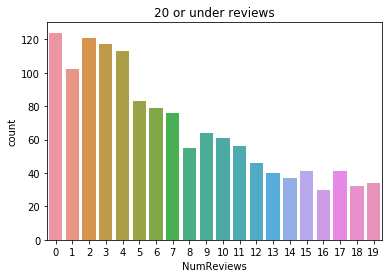

In [560]:
# Let's graph the count of the number of reviews to get a better idea of where to make a cutoff
temp_df = df_leafly[df_leafly.NumReviews<20]

import seaborn as sns
sns.countplot(x=temp_df.NumReviews, data=temp_df)
plt.title("20 or under reviews")
plt.show();

In [562]:
len(df_leafly)

2733

Seeing as the descent in number of reviews is pretty consistent and suggests no obvious cutoff point, I shall set the threshold to be at 2 reviews. This reduces our data to about 92% of its original size - any more and we'd be removing more than 10% of our data!

In [563]:
df_leafly_cut = df_leafly.copy()

In [572]:
# Remove strains with only 0 or 1 review
df_leafly_cut = df_leafly[df_leafly.NumReviews > 1]
len(df_leafly_cut)

2507

In [576]:
# There are now no Nans in the dataframe
df_leafly_cut.isna().sum()

index                 0
Strain                0
Url                   0
Strain_type           0
Rating                0
NumReviews            0
Effmedneg             0
Strain_description    0
Parents               0
Flavours              0
Review_breakdown      0
dtype: int64

Our two frames are now clean! Let's export them both.

In [579]:
df_leafly.to_csv("leafly.csv")
df_leafly_cut.to_csv("leafly_cut.csv")